In [69]:
import os
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import contextily as ctx
import matplotlib.image as mpimg
import matplotlib
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import geos
import mpl_toolkits
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc


In [2]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

The above cell is for the basemap function actiivation

In [3]:
from mpl_toolkits.basemap import Basemap

In [45]:
df1=pd.read_csv('fire_nrt_M6_96619.csv')

In [46]:
df1.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,-14.281,143.636,323.9,1.7,1.3,2019-10-01,25,Terra,MODIS,70,6.0NRT,302.3,26.8,D
1,-14.284,143.532,343.5,1.7,1.3,2019-10-01,25,Terra,MODIS,90,6.0NRT,306.3,84.3,D
2,-14.302,143.706,320.2,1.7,1.3,2019-10-01,25,Terra,MODIS,30,6.0NRT,305.0,14.1,D
3,-14.283,143.652,320.4,1.7,1.3,2019-10-01,25,Terra,MODIS,57,6.0NRT,303.3,18.4,D
4,-14.285,143.521,349.4,1.7,1.3,2019-10-01,25,Terra,MODIS,94,6.0NRT,304.7,110.7,D


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183593 entries, 0 to 183592
Data columns (total 14 columns):
latitude      183593 non-null float64
longitude     183593 non-null float64
brightness    183593 non-null float64
scan          183593 non-null float64
track         183593 non-null float64
acq_date      183593 non-null object
acq_time      183593 non-null int64
satellite     183593 non-null object
instrument    183593 non-null object
confidence    183593 non-null int64
version       183593 non-null object
bright_t31    183593 non-null float64
frp           183593 non-null float64
daynight      183593 non-null object
dtypes: float64(7), int64(2), object(5)
memory usage: 19.6+ MB


In [48]:
df1_night=df1.loc[df1['daynight'].isin(['N'])]
df1_day=df1.loc[df1['daynight'].isin(['D'])]

In [49]:
df1_night

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
687,-17.092,143.387,308.8,2.2,1.4,2019-10-01,1235,Terra,MODIS,19,6.0NRT,294.6,19.2,N
688,-17.094,143.381,306.2,2.2,1.4,2019-10-01,1235,Terra,MODIS,12,6.0NRT,294.0,14.1,N
689,-18.250,142.513,303.0,2.7,1.6,2019-10-01,1235,Terra,MODIS,28,6.0NRT,292.2,14.2,N
690,-27.558,147.194,301.0,1.7,1.3,2019-10-01,1235,Terra,MODIS,36,6.0NRT,288.5,11.0,N
691,-27.546,147.193,325.2,1.7,1.3,2019-10-01,1235,Terra,MODIS,100,6.0NRT,289.4,51.4,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183588,-32.675,122.113,300.5,2.4,1.5,2020-01-11,1515,Terra,MODIS,19,6.0NRT,289.3,15.3,N
183589,-16.708,129.646,300.5,1.0,1.0,2020-01-11,1645,Aqua,MODIS,16,6.0NRT,280.8,2.9,N
183590,-16.747,129.653,301.8,1.0,1.0,2020-01-11,1645,Aqua,MODIS,23,6.0NRT,277.9,3.7,N
183591,-32.484,121.319,306.5,1.4,1.2,2020-01-11,1650,Aqua,MODIS,68,6.0NRT,291.9,11.6,N


In [50]:
lat_d=df1_day['latitude'].values
lon_d=df1_day['longitude'].values
brg_d=df1_day['brightness'].values

lat_n=df1_night['latitude'].values
lon_n=df1_night['longitude'].values
brg_n=df1_night['brightness'].values

In [51]:
lat=df1['latitude'].values
lon=df1['longitude'].values
brg=df1['brightness'].values


/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



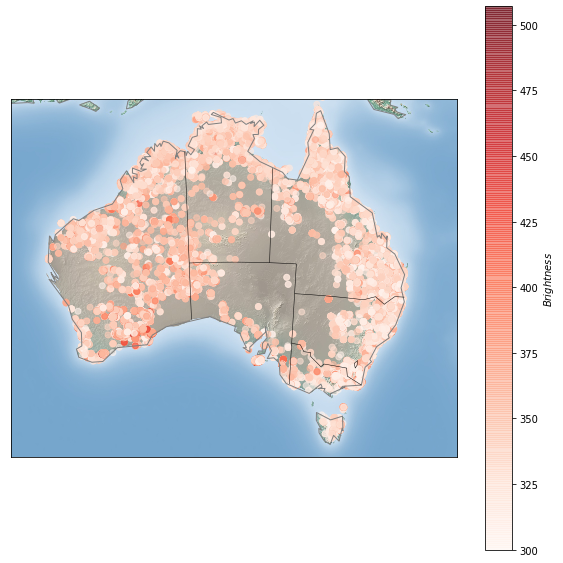

In [38]:
fig=plt.figure(figsize=(10,10))
m=Basemap(projection='lcc',resolution='c',lat_0=-27.6,lon_0=134,width=5E6,height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='black')
m.scatter(lon,lat,c=brg,latlon=True,cmap='Reds',alpha=0.6)
plt.colorbar(label='$Brightness$')


The latitude and longitude of Australia is 27.6 degrees South and 134 degrees East

The various scatters are shown where bush fires were at peak

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



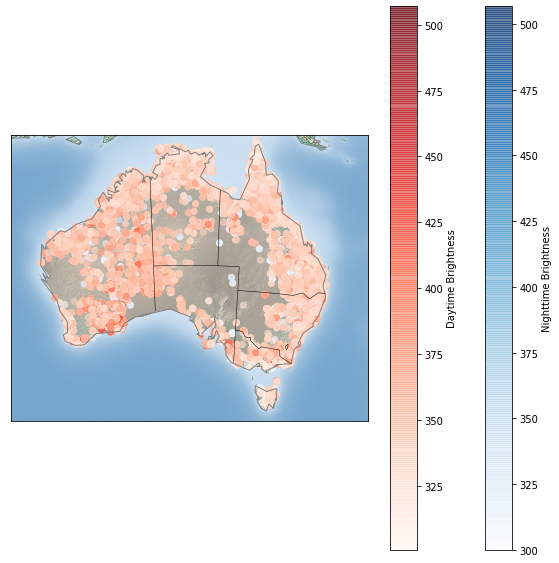

In [55]:
fig=plt.figure(figsize=(10,10))
m=Basemap(projection='lcc',resolution='c',lat_0=-27.6,lon_0=134,width=5E6,height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='black')
m.scatter(lon_n,lat_n,c=brg_n,latlon=True,cmap='Blues',alpha=0.6)
plt.colorbar(label='Nighttime Brightness')
m.scatter(lon_d,lat_d,c=brg_d,latlon=True,cmap='Reds',alpha=0.6)
plt.colorbar(label='Daytime Brightness')

In [56]:
df1_hot=df1[df1.brightness>450]

In [57]:
df1_hot

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
293,-15.516,134.489,457.0,1.1,1.0,2019-10-01,450,Aqua,MODIS,100,6.0NRT,339.3,879.8,D
358,-14.131,131.346,480.6,1.0,1.0,2019-10-01,450,Aqua,MODIS,100,6.0NRT,400.1,1219.5,D
371,-14.132,131.337,478.1,1.0,1.0,2019-10-01,450,Aqua,MODIS,100,6.0NRT,400.1,1173.6,D
535,-13.851,132.856,474.0,1.0,1.0,2019-10-01,450,Aqua,MODIS,100,6.0NRT,400.1,1060.5,D
1866,-13.882,132.956,485.2,1.2,1.1,2019-10-03,440,Aqua,MODIS,100,6.0NRT,400.1,1571.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180657,-32.528,123.142,451.4,1.7,1.3,2020-01-08,520,Aqua,MODIS,100,6.0NRT,341.3,1589.6,D
181590,-32.355,115.859,465.4,1.1,1.1,2020-01-09,600,Aqua,MODIS,100,6.0NRT,328.1,1071.9,D
181592,-32.357,115.847,450.6,1.1,1.1,2020-01-09,600,Aqua,MODIS,100,6.0NRT,339.1,824.2,D
182798,-36.159,149.439,457.4,1.1,1.0,2020-01-11,410,Aqua,MODIS,100,6.0NRT,400.1,902.9,D


In [58]:
lat_hot=df1_hot['latitude'].values
lon_hot=df1_hot['longitude'].values
brg_hot=df1_hot['brightness'].values

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



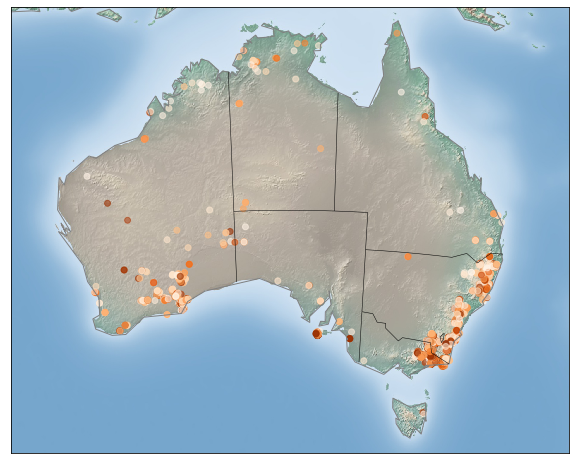

In [59]:
fig=plt.figure(figsize=(10,10))
m=Basemap(projection='lcc',resolution='c',lat_0=-27.6,lon_0=134,width=5E6,height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='black')
m.scatter(lon_hot,lat_hot,c=brg_hot,latlon=True,cmap='Oranges',alpha=0.6)

Highest effected regions by the bushfire in Australia

In [71]:
time=df1['acq_date'].values
time

array(['2019-10-01', '2019-10-01', '2019-10-01', ..., '2020-01-11',
       '2020-01-11', '2020-01-11'], dtype=object)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


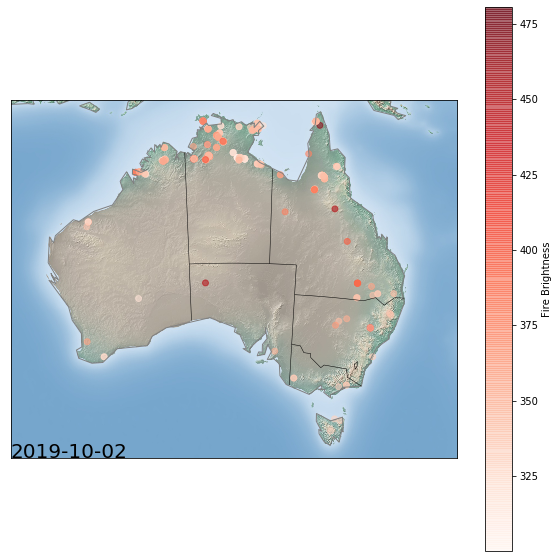

In [107]:
fig=plt.figure(figsize=(10,10))
m=Basemap(projection='lcc',resolution='c',lat_0=-27.6,lon_0=134,width=5E6,height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='black')
time_unique=np.unique(time)
date_text=plt.text(-170,80,time_unique[0],fontsize=20)
data=df1[df1['acq_date'].str.contains(time_unique[0])]
cmap=plt.get_cmap('Reds')
xs,ys=data['longitude'].values,data['latitude'].values
scat=m.scatter(xs,ys,c=data['brightness'].values,cmap=cmap, latlon=True, alpha=0.6)
plt.colorbar(label='Fire Brightness')


empty_index=[]
for i in range(1,len(time_unique),10):
    empty_index.append(i)
def update(i):
    current_date=time_unique[i]
    data=df1[df1['acq_date'].str.contains(time_unique[i])]
    xs, ys = m(data['longitude'].values, data['latitude'].values)
    X=np.c_[xs,ys]
    scat.set_offsets(X)
    date_text.set_text(current_date)
ani=matplotlib.animation.FuncAnimation(fig,update,interval=5,frames=empty_index)

from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')


import io
import base64

filename = 'animation.gif'

ani.save('animation.gif', fps=1)
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)

